In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Activation Functions

1. Sigmoid function

In [67]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))

In [68]:
x_data=np.linspace(-10,10,1000)

In [69]:
data_sigmoid=[sigmoid(x) for x in x_data]

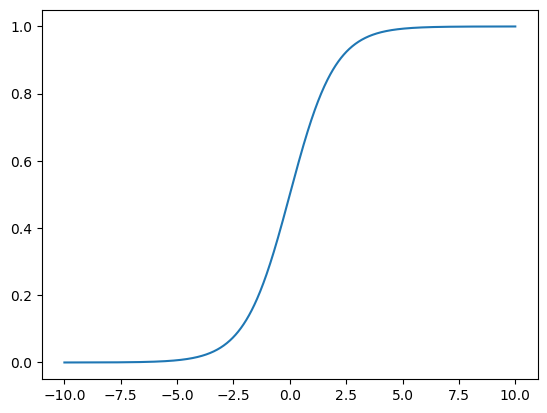

In [70]:
plt.plot(x_data, data_sigmoid)

2. Tanh function

In [7]:
def tanh(x):
    numerator= 1 - np.exp(-2 * x)
    denominator= 1 + np.exp(-2 * x)
    return numerator/denominator

In [8]:
x_data= np.linspace(-4,4,1000)

In [9]:
data_tanh=[tanh(x) for x in x_data]

Text(0, 0.5, 'Tanh(X)')

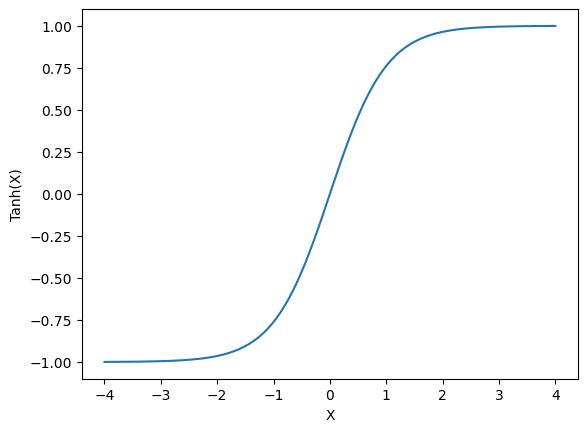

In [10]:
plt.plot(x_data,data_tanh)
plt.xlabel("X")
plt.ylabel("Tanh(X)")

3. Rectified Linear Unit function(ReLU)

In [11]:
def ReLU(x):
    if x<0:
        return 0
    else:
        return x

In [12]:
x_data = np.linspace(-10, 10, 1000)

In [13]:
data_ReLU = [ReLU(x) for x in x_data]

Text(0, 0.5, 'ReLU(X)')

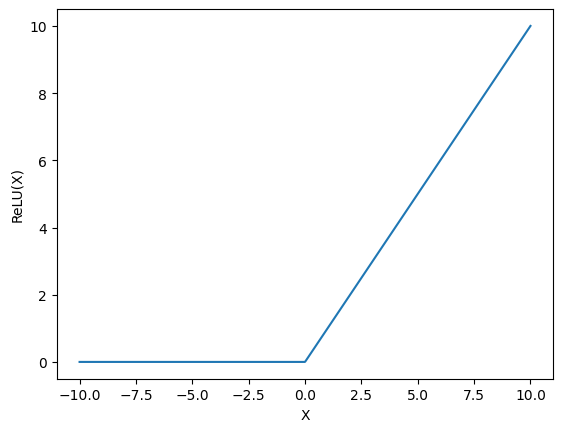

In [14]:
plt.plot(x_data, data_ReLU)
plt.xlabel("X")
plt.ylabel("ReLU(X)")

4. Leaky ReLU function

In [23]:
def leakyReLU(x,alpha=0.1):
    if x<0:
        return (alpha*x)
    else:
        return x

In [24]:
x_data = np.linspace(-1000, 1000, 10000)

In [25]:
data_leakyReLU = [leakyReLU(x) for x in x_data]

Text(0, 0.5, 'Leaky ReLU(X)')

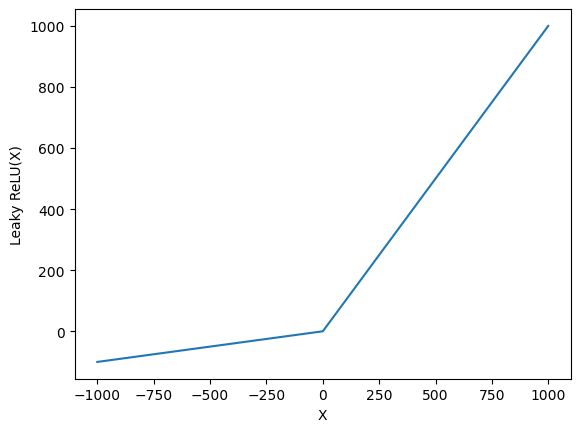

In [26]:
plt.plot(x_data, data_leakyReLU)
plt.xlabel("X")
plt.ylabel("Leaky ReLU(X)")

5. Exponential linear unit function(ELU)

In [33]:
def ELU(x,alpha=1):
    if x<0:
        return ((alpha*(np.exp(x)-1)))
    else:
        return x

In [34]:
x_data= np.linspace(-10, 10, 1000)

In [35]:
data_ELU=[ELU(x) for x in x_data]

Text(0, 0.5, 'ELU(X)')

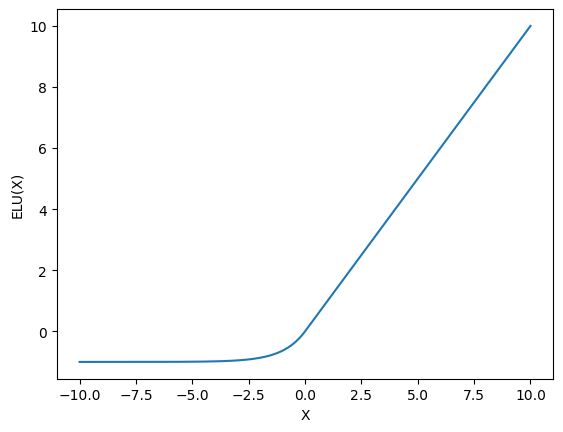

In [36]:
plt.plot(x_data, data_ELU)
plt.xlabel("X")
plt.ylabel("ELU(X)")

6. Swish function

In [37]:
def swish(x,beta):
    return 2*x*sigmoid(beta*x)

In [55]:
x_data = np.linspace(-10000, 10000, 100000)

In [56]:
data_swish = [swish(x, 0.001) for x in x_data]

Text(0, 0.5, 'Swish(X)')

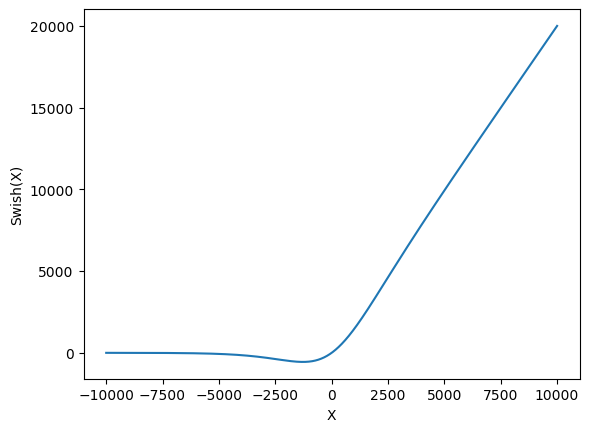

In [57]:
plt.plot(x_data, data_swish)
plt.xlabel("X")
plt.ylabel("Swish(X)")

7. Softmax function

In [58]:
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=0)

## Forward propagation in ANN 

In [59]:
def forward_prop(X,Wxh,Why):
    z1 = np.dot(X,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)
    return z1,a1,z2,y_hat

## How does ANN learn? / Backward propagation

In [71]:
def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    return dJ_dWxh, dJ_dWhy

## Building a neural network from scratch

Prepare the data as shown in the preceding XOR table:

In [72]:
X = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
y = np.array([ [1], [1], [0], [0]])

Define the number of nodes in each layer:

In [73]:
num_input = 2
num_hidden = 5
num_output = 1

Initialize the weights and bias randomly. First, we initialize the input to hidden layer weights:

In [89]:
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

Now, we initialize the hidden to output layer weights:

In [90]:
Why = np.random.randn (num_hidden,num_output)
by = np.zeros((1,num_output))

Define the derivative of the sigmoid function:

In [91]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

Define the cost function:

In [92]:
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J

Set the learning rate and the number of training iterations:

In [93]:
alpha = 0.01
num_iterations = 5000

Now, let's start training the network with the following code:

In [94]:
cost =[]

for i in range(num_iterations):
    z1,a1,z2,y_hat = forward_prop(X,Wxh,Why)
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
    
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy
   
    c = cost_function(y, y_hat)
    cost.append(c)

Plot the cost function:

Text(0, 0.5, 'Cost')

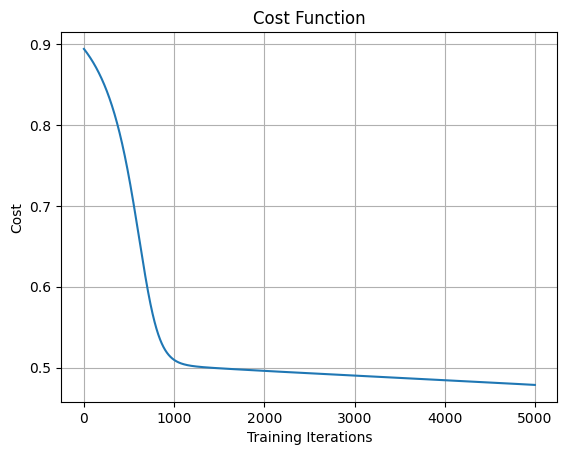

In [95]:
plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')